In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [73]:
n = 10
probs = np.random.rand(n) #A
epsilon = 0.2

probs

array([0.21857571, 0.20634923, 0.31753753, 0.20832909, 0.19378361,
       0.78221833, 0.8634407 , 0.41686068, 0.19497353, 0.51925899])

In [2]:
def get_reward(prob, n=10):
    reward = 0;
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

In [25]:
get_reward(0.7)

5

In [35]:
reward_test = [get_reward(0.7) for _ in range(2000)]

In [36]:
np.mean(reward_test)

7.014

(array([  4.,  20.,  65., 205., 421., 507., 467., 246.,  65.]),
 array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
         6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ]),
 <BarContainer object of 9 artists>)

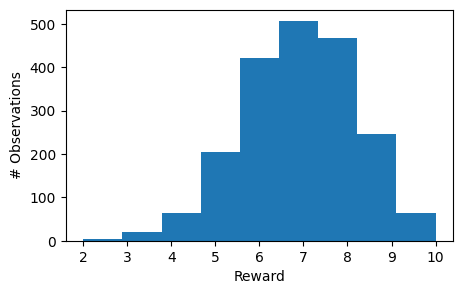

In [40]:
plt.figure(figsize=(5, 3))
plt.xlabel("Reward")
plt.ylabel("# Observations")
plt.hist(reward_test, bins=9)

In [44]:
record = np.zeros((n,2))

record

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [45]:
def get_best_arm(record):
    arm_index = np.argmax(record[:,1],axis=0)
    return arm_index

get_best_arm(record)

0

In [46]:
def update_record(record, action, r):
    new_r = (record[action,0] * record[action,1] + r) / (record[action,0] + 1)
    record[action,0] += 1
    record[action,1] = new_r
    return record

[2, 2, 2, 9, 9, 9, 9, 9, 9, 4, 9, 1, 4, 9, 9, 4, 9, 9, 9, 9, 5, 5, 5, 3, 5, 5, 5, 0, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 7, 5, 5, 1, 5, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 8, 6, 6]
[[ 2.          1.5       ]
 [ 3.          3.        ]
 [ 3.          3.33333333]
 [ 1.          5.        ]
 [ 5.          2.        ]
 [54.          8.2037037 ]
 [15.          8.86666667]
 [ 2.          3.        ]
 [ 2.          1.5       ]
 [13.          6.07692308]]


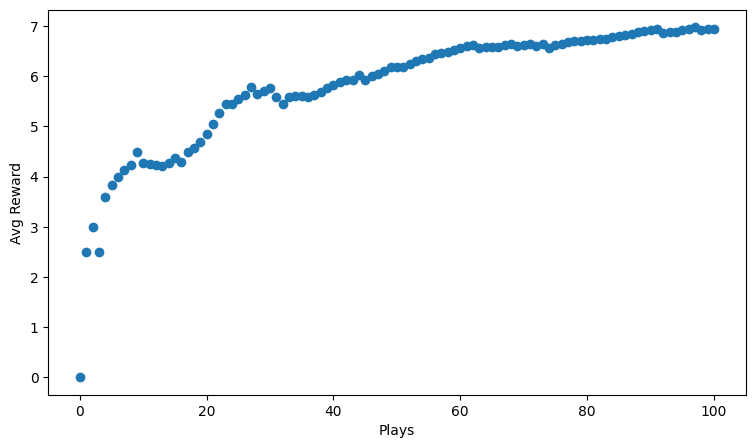

In [74]:
record = np.zeros((n,2))

# Solving the n-armed bandit
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
choice_list = []
for i in range(100):
    if random.random() > epsilon:
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(10)
    choice_list.append(choice)
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward) # type: ignore
    
ax.scatter(np.arange(len(rewards)),rewards)
print(choice_list)
print(record)

In [75]:
def softmax(av, tau=1.12):
    softm = ( np.exp(av / tau) / np.sum( np.exp(av / tau) ) )
    return softm

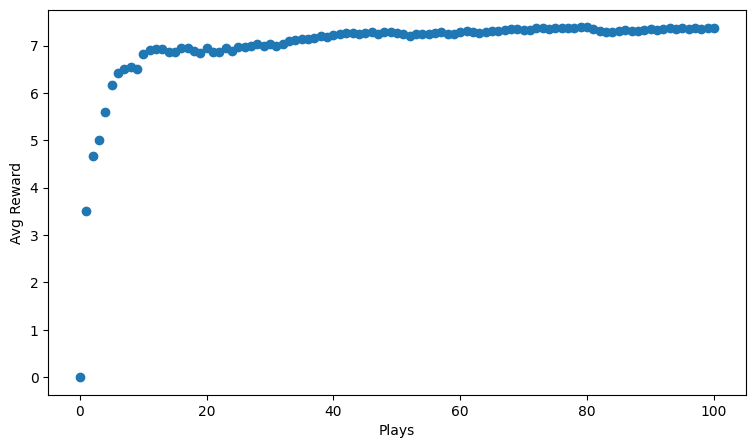

In [91]:
record = np.zeros((n,2))

# using softmax to solve n-armed bandit
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
for i in range(100):
    p = softmax(record[:,1],tau=0.7)
    choice = np.random.choice(np.arange(n),p=p)
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward) # type: ignore
ax.scatter(np.arange(len(rewards)),rewards)

In [79]:
softmax(record[:, 1])

array([0.00082312, 0.0031413 , 0.00423023, 0.01873421, 0.00128631,
       0.32727514, 0.59154185, 0.0031413 , 0.00082312, 0.04900341])

In [76]:
np.random.choice??

Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

.. versionadded:: 1.7.0

.. note::
    New code should use the `~numpy.random.Generator.choice`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if it were ``np.arange(a)``
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement. Default is True,
    meaning that a value of ``a`` can be selected multiple times.
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given, the sample assumes a unif

In [167]:
a = np.arange(10)
p = softmax(np.random.rand(10))
p

array([0.11335723, 0.07123968, 0.06744633, 0.08155343, 0.09017349,
       0.08840795, 0.14475602, 0.08728626, 0.12185146, 0.13392814])

In [168]:
x = []
for i in range(500):
    x.append(np.random.choice(a, p=p))

(array([63., 39., 36., 41., 50., 47., 63., 42., 68., 51.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

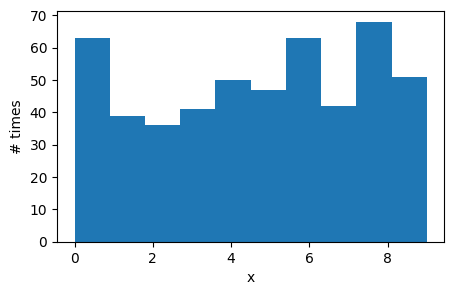

In [169]:
plt.figure(figsize=(5, 3))
plt.xlabel("x")
plt.ylabel("# times")
plt.hist(x, bins=10)